**Revisión de datos de TTDP.**
Juan Sebastián Navas

##**Contexto y Origen de las Instancias TTDP.**

El Tourist Trip Desing Problem (TTDP) es un problmea de planificación de rutas turísticas que busca armas itinerarios óptimos para uno o varios turistas, respetando restricciones de tiempo, preferencias y desponibiliad [1].
En la bibliografía comumente encontramos que se modela como una variante del
**Orienteering problem con ventanas de tiempo (TOPTW)**
y extensiones para múltiples rutas (Team Orienteering) y preferencias heterogéneas [2][3].

**Jairo R. Montoya-Torres** y colaboradores han propuesto instancias de prueba para el TTDP en dos categorías:
**(1) Instancias sintéticas** “TTDP-small” (HP-TOPTW-j) diseñadas ad-hoc para investigación, y **(2) Instancias de caso real (Toptw-j)** basadas en datos turísticos reales de Sucre, Colombia
. A continuación se detalla cada conjunto de instancias, su formato, construcción y datos representados, haciendo énfasis especial en las instancias TTDP-small.



**Instancias TTDP-small (sintéticas HP-TOPTW-j)**
Las instancias TTDP-small corresponden a datos de prueba pequeños generados artificialmente para experimentar con modelos TTDP de preferencias heterogéneas. **El acrónimo HP-TOPTW-j alude a “Heterogeneous Preferences Team Orienteering Problem with Time Windows”, y la letra “j” identifica esta familia de instancias desarrollada por el grupo de Montoya-Torres.** Cada instancia HP-TOPTW-j se caracteriza por: número de rutas (k), número total de puntos de interés POIs (i, incluyendo el punto inicial/final), número de turistas en el grupo (u) y número de modos de transporte disponibles (l)
https://jrmontoya.wordpress.com/research/instances/

** Instancias TTDP-small (sintéticas HP-TOPTW-j)**

Estas instancias fueron diseñadas **ad-hoc** para experimentación controlada.  
Características principales:
- Generadas artificialmente, sin corresponder a ciudades reales.
- Tamaños: **11, 16 y 21 nodos**, con 5 variantes por tamaño (a-e).
- Formato: nombre de instancia, parámetros generales (`k i u l`), seguido de vértices con atributos.

**Atributos de cada POI:**
- Coordenadas (X,Y).
- Tiempo de servicio (S) = 90 min.
- Beneficio (p): utilidad turística.
- Ventana temporal [a,b].
- Factor de importancia (f).

**Ejemplo:**  
`hptoptw-j11a`: 2 rutas, 11 vértices (10 POIs + depot), 5 turistas, 3 modos.

**Ejemplo de datos:**
- Coordenadas distribuidas aleatoriamente en rango (0-70).
- Ventanas horarias escalonadas (mañana/tarde).
- Beneficios p en valores discretos (10, 20, 30, 40).
- Horizonte temporal según tamaño: ~700 (11 nodos), ~830 (16 nodos), ~1100–1250 (21 nodos).

Fuente: ttps://jrmontoya.wordpress.com/research/instances/ttdp-small/

## Instancias TTDP de Caso Real (Sucre, Colombia)

Estas instancias, denominadas **Toptw-j***, provienen de datos verídicos del departamento de Sucre (Colombia).  
Fuente de datos: **Viceministerio de Turismo de Colombia (2020)**.

**Tipos de instancias:**
- `Toptw-jMun-x`: por municipio (8 instancias).
- `Toptw-jClass-x`: por categoría turística (5 instancias).
- `Toptw-jSubR-x`: por subregión turística (2 instancias).
- `Toptw-jGen`: corredor completo (~201 POIs).

**Datos incluidos:**
- Coordenadas geográficas de POIs.
- Ventanas horarias reales.
- Costos de transporte por modo.
- Tiempo de servicio (S) ajustado por tipo de actividad.
- Clasificación temática (sol y playa, cultural, religioso, ecoturismo, etc.).

**Aplicación:**
- Análisis de rutas reales para múltiples turistas y modos.
- Integración de objetivos de sostenibilidad (emisiones de CO₂) y satisfacción.

Fuente: [jrmontoya.wordpress.com](https://jrmontoya.wordpress.com/research/instances/)


## Conclusiones

- **TTDP-small:** Benchmarks sintéticos controlados, útiles para experimentación inicial.
- **TTDP reales:** Casos auténticos basados en turismo en Sucre, Colombia, para validar en escenarios reales.
- Ambas colecciones comparten formato común pero difieren en complejidad y fidelidad.

Estas instancias son empleadas en la literatura como referencia estándar para investigación en optimización de rutas turísticas.


**Exploración instancia hptoptw-j21a.xlsx**

En este ejercicio se realizará un análisis exploratorio y una validación técnica detallada de la instancia hptoptw-j21a, perteneciente al conjunto de instancias sintéticas TTDP-small (HP-TOPTW-j).
El objetivo de esta validación es asegurar que los datos de la instancia sean coherentes, completos y consistentes antes de utilizarlos como base en experimentos avanzados de investigación.


In [ ]:
# Se intalan las liberías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carga de Datos
file_path = '/content/hptoptw-j21a.xlsx'
datos_df = pd.read_excel(file_path, sheet_name='Datos')
dst_df = pd.read_excel(file_path, sheet_name='DST')
dt_df = pd.read_excel(file_path, sheet_name='DT')
# Vista preliminar
print("Dimensiones:", datos_df.shape)
datos_df.head()

Dimensiones: (21, 13)


,Unnamed: 0,X,Y,S,p,a,b,f,hptoptw-j21a,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,38,48,0,0,1,1236,0.80,NaN,NaN,NaN,NaN,NaN
1,2,44,70,90,10,912,967,0.70,NaN,k,i,u,l
2,3,44,68,90,30,825,870,0.85,NaN,3,21,6,3
3,4,41,64,90,10,65,146,0.75,NaN,NaN,NaN,NaN,NaN
4,5,41,70,90,10,727,782,1.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Eliminar columnas innecesarias
cols_to_drop = ['hptoptw-j21a']
cols_to_drop += [col for col in datos_df.columns if 'Unnamed' in col]
datos_df = datos_df.drop(columns=cols_to_drop, errors='ignore')

In [ ]:
#Se completan los datos vacios
datos_df = datos_df.fillna(0)
#Se verifica el resultado
print(datos_df.head(21))

     X   Y   S   p    a     b     f
0   38  48   0   0    1  1236  0.80
1   44  70  90  10  912   967  0.70
2   44  68  90  30  825   870  0.85
3   41  64  90  10   65   146  0.75
4   41  70  90  10  727   782  1.00
5   42  66  90  10   15    67  0.50
6   38  70  90  20  621   702  0.00
7   40  64  90  20  170   225  0.00
8   39  68  90  20  255   324  0.00
9   40  72  90  10  534   605  0.00
10  36  64  90  10  357   410  0.00
11  36  67  90  10  448   505  0.00
12  26  85  90  20  652   721  0.00
13  23  76  90  30   30    92  0.00
14  23  85  90  10  567   620  0.00
15  18  82  90  40  384   429  0.00
16  20  85  90  40  475   528  0.00
17  20  76  90  20   99   148  0.00
18  14  75  90  20  179   254  0.00
19  15  82  90  10  278   345  0.00
20  32  49  90  10   10    73  0.00


In [ ]:
#Se nombra la primera columa como ID
datos_df.rename(columns={datos_df.columns[0]: 'ID'}, inplace = True)
#Se verifica el resultado
print(datos_df.head())

   ID   Y   S   p    a     b     f
0  38  48   0   0    1  1236  0.80
1  44  70  90  10  912   967  0.70
2  44  68  90  30  825   870  0.85
3  41  64  90  10   65   146  0.75
4  41  70  90  10  727   782  1.00


In [ ]:
#Se crea un DataFrame con los parámetros
parametros_df = pd.DataFrame({
    'k': [3],
    'i': [21],
    'u': [6],
    'l': [3]
})
#Mostrar el resultado
print(parametros_df)

   k   i  u  l
0  3  21  6  3


ID: identificador del punto (0 es el depot).

X, Y: coordenadas euclidianas.

S: tiempo de servicio requerido en el punto.

P: beneficio asociado (utilidad turística).

A, B: ventana de tiempo (horario de apertura y cierre).

F: factor de importancia para preferencias del turista.

Incluye también las últimas filas con parámetros globales:

k: número de rutas o vehículos (turistas en paralelo).

i: número total de vértices (incluye depot).

u: número de turistas.

l: número de modos de transporte.

In [ ]:
## Validaciones básicas
print("\nValores nulos por columna:\n", datos_df.isnull().sum())
print("\nTipos de datos:\n", datos_df.dtypes)

assert (datos_df['p'] >= 0).all(), "Error: Hay beneficios negativos."
assert (datos_df['b'] >= datos_df['a']).all(), "Error: Ventanas temporales invertidas."



Valores nulos por columna:
 ID    0
Y     0
S     0
p     0
a     0
b     0
f     0
dtype: int64

Tipos de datos:
 ID      int64
Y       int64
S       int64
p       int64
a       int64
b       int64
f     float64
dtype: object


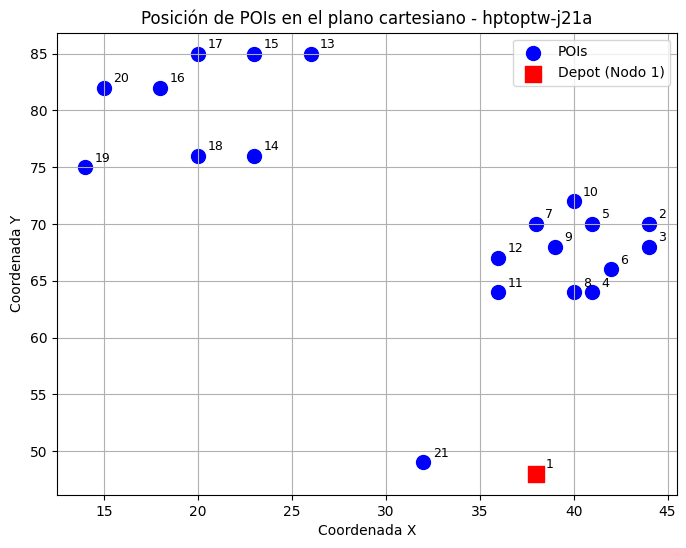

In [ ]:
#VIsualización de los puntos de
# Crear el gráfico
plt.figure(figsize=(8, 6))

# Add a new column for node IDs
datos_df['node_id'] = datos_df.index + 1

# Graficar todos los POIs
plt.scatter(datos_df['ID'], datos_df['Y'], c='blue', s=100, label='POIs')

# Etiquetar cada punto con su ID
for i, row in datos_df.iterrows():
    plt.text(row['ID'] + 0.5, row['Y'] + 0.5, str(int(row['node_id'])), fontsize=9)

# Destacar el nodo 0 (Depot)
depot = datos_df.iloc[0]
plt.scatter(depot['ID'], depot['Y'], c='red', s=120, marker='s', label='Depot (Nodo 1)')

# Configurar el gráfico
plt.title("Posición de POIs en el plano cartesiano - hptoptw-j21a")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.grid(True)
plt.legend()
plt.show()

**Resumen del conjunto de instancias toptw-j... **
(TTDP - Sucre, Colombia)
Las instancias toptw-j... representan una colección de datos reales del departamento de Sucre (Colombia), diseñadas para resolver el Tourist Trip Design Problem (TTDP) con restricciones prácticas y objetivos sostenibles.

**1. Hoja Presentación o Datos**
Contiene la lista de Puntos de Interés (POIs) con sus atributos:

**Número:** identificador único del POI.

**Nombre:** nombre del sitio turístico.

**Latitud, Longitud:** coordenadas geográficas.

**Categoría:** tipo de turismo (Cultural, Sol y Playa, Religioso, etc.).

**P: Profit o utilidad del siti**o (valor a maximizar).

**S: tiempo estimado de visita** (min).

**A, B:** ventana de tiempo de visita (apertura y cierre, en minutos desde el inicio del día).

Pre: costo de entrada (opcional, usado para presupuesto del turista).

os valores de Profit fueron definidos por los investigadores a partir de criterios cualitativos y cuantitativos de importancia turística.

Según Ruiz-Meza et al. (2021, 2022), los valores de P se asignaron considerando:

La categoría turística (p. ej., Cultural, Sol y Playa, Religioso, etc.).

La popularidad percibida de los sitios (según inventarios del Viceministerio de Turismo y guías locales).

Escalas discretas para simplificar el modelo (p. ej., valores como 10, 20, 30... o en Sucre valores en el rango -50–80).

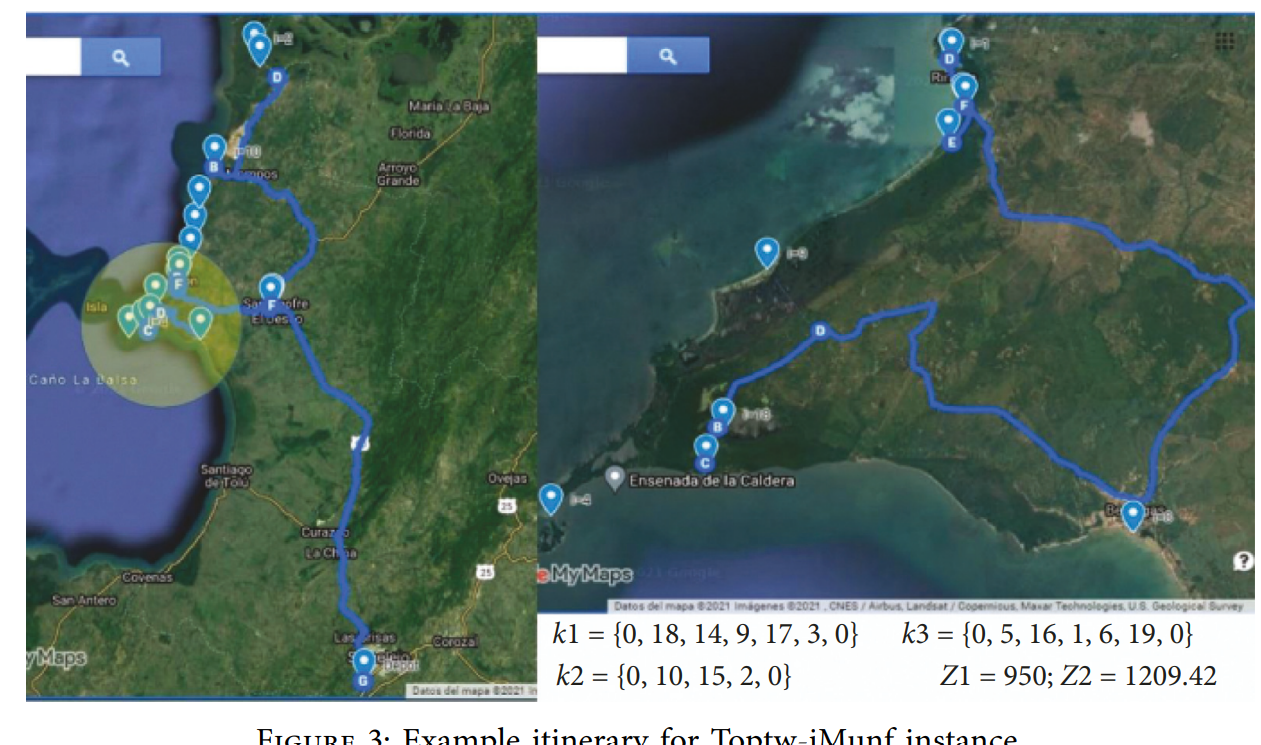

# Otras instancias para Públicas para TTDP y Problemas Relacionados

Otros **benchmarks públicos** ampliamente reconocidos en la literatura.



## 1. Benchmarks clásicos de OP y TOP
- **Tsiligirides (1984)**: 3 instancias pequeñas (~30 nodos). Primer benchmark OP.
- **Chao OP (1996)**: 14 + 26 instancias (64 y 66 nodos).
- **Chao TOP (1996)**: 4 sets (320 instancias, 64–102 nodos, 2–4 rutas).
- **Fischetti (1998)**: OP basado en TSP/VRP (50–100+ nodos)


## 2. Benchmarks de TOPTW (Ventanas de tiempo)
- **Solomon-based TOPTW (2006)**: 29 instancias derivadas de VRPTW (100 nodos, ≤50 visitables).
- **Cordeau-based TOPTW (2006)**: 8 instancias (48–233 nodos).
- **Montemanni (2009)**: Extensiones hasta 200 nodos


## 3. Datos reales de TTDP
- **Singapur (2015)**: 50 POIs turísticos reales.
- **Chiang Mai (2020)**: 30–50 POIs reales.
- **Tours, Francia (2022)**: Itinerarios reales con categorías y precedencias.
- **Sebastia et al.**: 173 atracciones, 91 hoteles (España).
- **Rodríguez et al.**: 2154 POIs (gran escala).



## Formatos y acceso
- Formatos comunes: `.txt`, `.csv`, `.xlsx`, JSON.
- Repositorios principales:
  - https://people.cs.kuleuven.be/~peter.vansteenwegen/orienteering
  - http://www.mech.kuleuven.be/en/cib/oplib


Estos benchmarks (sintéticos y reales) son referencia estándar en la literatura de TTDP. Permiten validar algoritmos desde casos contro

# **Referencias**
[1] D. Gavalas, C. Konstantopoulos, K. Mastakas, and G. Pantziou, “A survey on algorithmic approaches for solving tourist trip design problems,” *Journal of Heuristics*, vol. 20, no. 3, pp. 291–328, Jun. 2014, doi: 10.1007/s10732-014-9235-2.

[2] P. Vansteenwegen, W. Souffriau, and D. Van Oudheusden, “The orienteering problem: A survey,” *European Journal of Operational Research*, vol. 209, no. 1, pp. 1–10, Feb. 2011, doi: 10.1016/j.ejor.2010.03.045.

[3] E. Ruiz-Meza and J. R. Montoya-Torres, “Integrating reinforcement learning and metaheuristics for safe and sustainable health tourist trip design problem,” *Expert Systems with Applications*, vol. 186, p. 115770, Dec. 2021, doi: 10.1016/j.eswa.2021.115770.

´
